# Multiclass Classification using Logistic Regression

Thanks for the dataset: [Dataset](https://github.com/eduai-repo/ML-Demo/blob/main/2%20Classification/Datasets/IRIS.csv)

## Import Necessary Libraries

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Exploratory Data Analysis

In [161]:
dataframe = pd.read_csv('../data/IRIS.csv')
dataframe.head()

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [162]:
dataframe = dataframe.drop(columns=['ID'])
dataframe.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [163]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [164]:
dataframe.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [165]:
dataframe.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [166]:
dataframe.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [167]:
dataframe['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: >

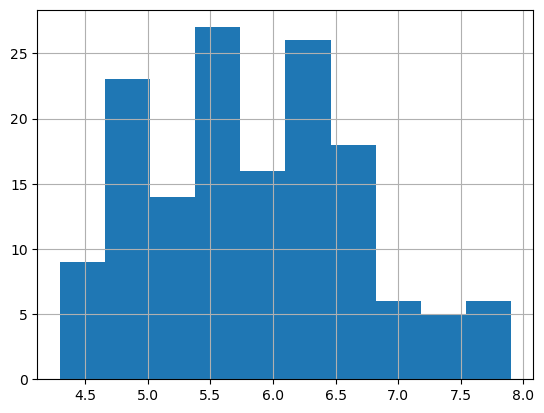

In [168]:
dataframe['Sepal.Length'].hist()

<Axes: >

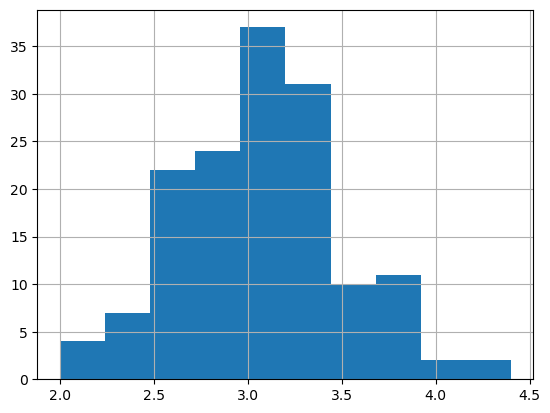

In [169]:
dataframe['Sepal.Width'].hist()

<Axes: >

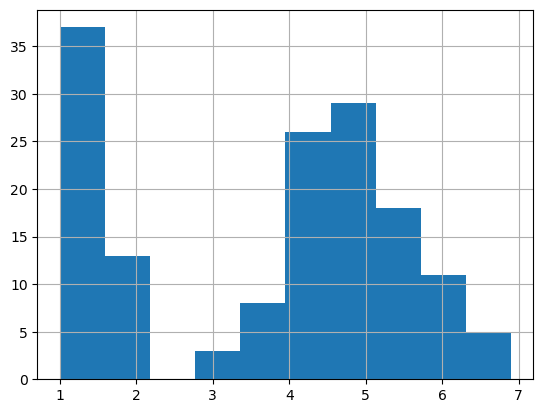

In [170]:
dataframe['Petal.Length'].hist()

<Axes: >

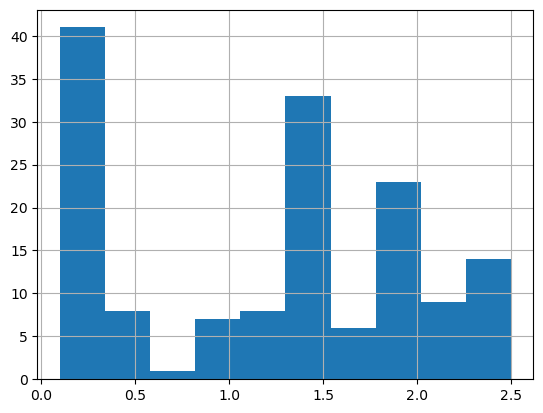

In [171]:
dataframe['Petal.Width'].hist()

In [172]:
dataframe['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [173]:
colors = ['red', 'orange', 'blue']
species = ['setosa', 'versicolor', 'virginica']

In [174]:
def eda_by_species(title, x_axis, y_axis):
    for i in range(3):
        x = dataframe[dataframe['Species'] == species[i]]
        plt.scatter(x[x_axis],x[y_axis], color=colors[i], label=species[i])

    plt.title(title)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.legend()
    plt.show()

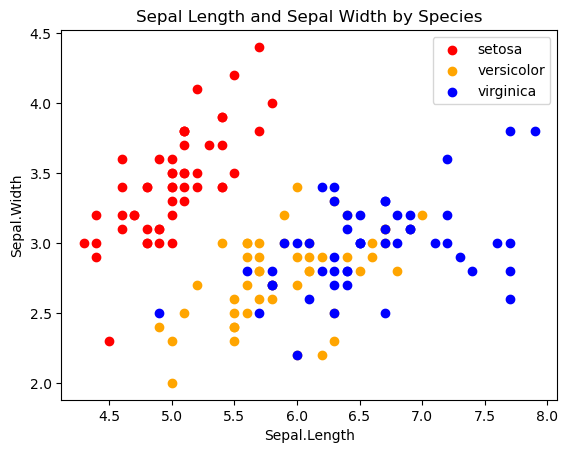

In [175]:
eda_by_species('Sepal Length and Sepal Width by Species', 'Sepal.Length', 'Sepal.Width')

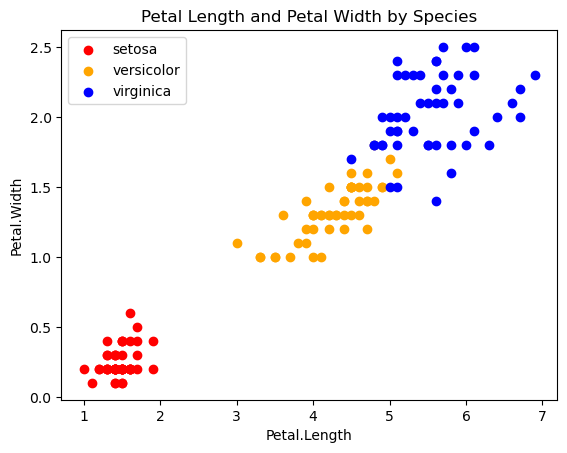

In [176]:
eda_by_species('Petal Length and Petal Width by Species','Petal.Length', 'Petal.Width')

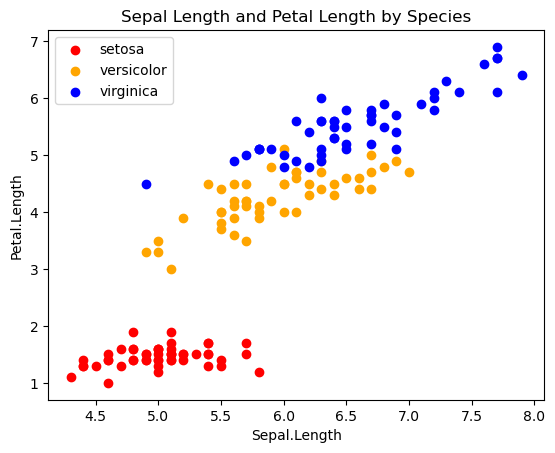

In [177]:
eda_by_species('Sepal Length and Petal Length by Species', 'Sepal.Length','Petal.Length')

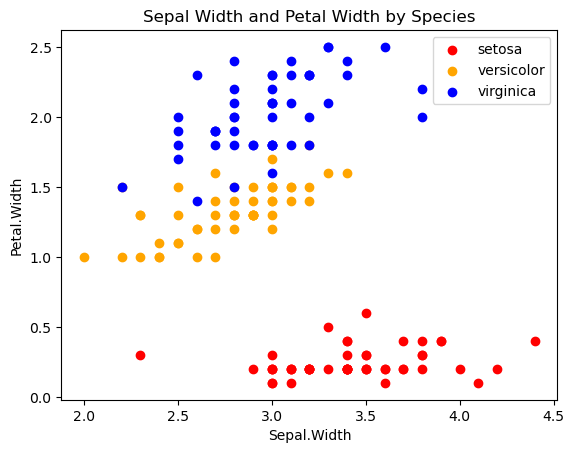

In [178]:
eda_by_species('Sepal Width and Petal Width by Species', 'Sepal.Width', 'Petal.Width')

In [179]:
dataframe['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## Data Preparation

In [180]:
dataframe['Species'] = dataframe['Species'].astype('category')
dataframe['Species'] = dataframe['Species'].cat.codes
dataframe

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [181]:
dataframe.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Assigning of X and y

In [182]:
X = dataframe.drop(columns=['Species'])
X

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [183]:
y = dataframe['Species']
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int8

## Splitting the Data into Training and Test Data

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

## Model Creation

In [185]:
mul_log_reg = LogisticRegression()

## Model Training

In [186]:
mul_log_reg.fit(X_train, y_train)

LogisticRegression()

## Model Prediction

In [187]:
y_pred = mul_log_reg.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0], dtype=int8)

## Model Evaluation

In [195]:
train_data_score = mul_log_reg.score(X_train, y_train)
test_data_score = mul_log_reg.score(X_test,y_test)

In [198]:
print('Train Data Score: ')
print(train_data_score * 100)
print()
print("Test Data Score: ")
print(test_data_score * 100)

Train Data Score: 
96.19047619047619

Test Data Score: 
100.0


In [188]:
cm = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [190]:
print('Confusion matrix: ')
print(cm)
print()
print('Classification Report: ')
print(report)
print()
print("Accuracy Score: ")
print(accuracy * 100)

Confusion matrix: 
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Accuracy Score: 
100.0
